In [95]:
# importing necessary libraries 
import pandas as pd
import numpy as np
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
from sklearn import tree

In [96]:
def compute_accuracy_and_error_rate(actual_values, predicted_values, total_predictions):
    correct_predictions = 0
    wrong_predictions = 0

    for actual, predicted in zip(actual_values, predicted_values):
        if actual == predicted:
            correct_predictions += 1
        else:
            wrong_predictions += 1
        
    print('\n --- Correct predictions: ', correct_predictions)
    print('\n --- Wrong predictions: ', wrong_predictions)   
    accuracy = correct_predictions / total_predictions 
    error_rate = wrong_predictions / total_predictions 
    pair = (accuracy, error_rate)
    
    return pair

In [97]:
file_path = '/kaggle/input/ibm-hr/HR-Em.csv'
data = pd.read_csv(file_path)

print('******************** Using all the features *******************\n')
print(data.shape)

#information about the number of rows, columns, column data types, memory usage
#The columns with object dtype are the possible categorical features in dataset.
print(data.info())

# I want to encode all the features that have categorical values, except the target which is 'JobRole'.
# The target is also a categorical variable and i will use label encoding for this one

data_cpy = data
column_to_be_deleted = ['JobRole']
data_cpy = data_cpy.drop(column_to_be_deleted, axis=1)

columns = data_cpy.columns
print('\nfeatures: ')
print(data_cpy.info())

******************** Using all the features *******************

(1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  Jo

In [98]:
# use one-hot encoding 
print('\ndata shape before one-hot encoding: ', data_cpy.shape)
data_cpy = pd.get_dummies(data_cpy)
print('\ndata shape after encoding: ', data_cpy.shape)


data shape before one-hot encoding:  (1470, 34)

data shape after encoding:  (1470, 48)


In [99]:
# I'll use label encoding for the target

print('\ndata shape: ', data.shape)

data['JobRole'].unique()

job_roles_number = data['JobRole'].value_counts()
print('\n ---- The job roles and their numbers: \n', job_roles_number)
job_roles_before_encoding = data['JobRole'].unique()
print('\n--- Job roles before label encoding: \n', job_roles_before_encoding)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['JobRoleCategory'] = label_encoder.fit_transform(data['JobRole'])

job_roles_after_encoding = data['JobRoleCategory'].unique()

print('\n--- Job roles after label encoding: \n', job_roles_after_encoding)


data shape:  (1470, 35)

 ---- The job roles and their numbers: 
 Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

--- Job roles before label encoding: 
 ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

--- Job roles after label encoding: 
 [7 6 2 4 0 3 8 5 1]


In [100]:
# X will be represented by the columns from data_cpy which has been one-hot encoded
# y will be represented by the JobRoleCategory column from data(this column has been label encoded)

features = data_cpy.columns
X = data_cpy[features]
y = data['JobRoleCategory']

print(X.head())
print(y.head())

   Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  \
0   41       1102                 1          2              1               1   
1   49        279                 8          1              1               2   
2   37       1373                 2          2              1               4   
3   33       1392                 3          4              1               5   
4   27        591                 2          1              1               7   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2          94               3         2  ...   
1                        3          61               2         2  ...   
2                        4          92               2         1  ...   
3                        4          56               3         1  ...   
4                        1          40               3         1  ...   

   EducationField_Other  EducationField_Technical Degree  Gender_Female  \

In [101]:
# split the data
# test_size=the proportion of the dataset to include in the test split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.07, random_state=1)

print('Initial size of the dataset:', len(X))
print('The size of the dataset used for training the model: ',len(train_X))
print('The size of the dataset used for validating the model: ',len(test_X))


Initial size of the dataset: 1470
The size of the dataset used for training the model:  1367
The size of the dataset used for validating the model:  103


In [102]:
## DECISION TREE REGRESSOR

print('\n\n*** Decision tree regressor ***')
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(train_X, train_y)

regressor_predictions = regressor.predict(test_X)
      
accuracy_dec_tree, error_rate_dec_tree = compute_accuracy_and_error_rate(test_y, regressor_predictions, len(regressor_predictions))

print('\n--- Job roles before label encoding: \n', job_roles_before_encoding)
print('\n--- Job roles after label encoding: \n', job_roles_after_encoding)
print('\n --- Predictions: \n', regressor_predictions)
print('\n --- Actual: \n', test_y)
print('\n--- Accuracy: ', accuracy_dec_tree)
print('\n--- Error rate: ', error_rate_dec_tree)



*** Decision tree regressor ***

 --- Correct predictions:  67

 --- Wrong predictions:  36

--- Job roles before label encoding: 
 ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

--- Job roles after label encoding: 
 [7 6 2 4 0 3 8 5 1]

 --- Predictions: 
 [4. 8. 6. 8. 0. 2. 3. 2. 7. 7. 4. 3. 8. 6. 6. 7. 1. 1. 6. 7. 2. 2. 6. 0.
 7. 2. 7. 8. 6. 6. 0. 7. 2. 4. 7. 6. 1. 1. 2. 2. 6. 4. 5. 8. 7. 6. 2. 4.
 4. 1. 5. 4. 7. 2. 7. 8. 2. 2. 7. 6. 3. 0. 3. 2. 0. 6. 6. 7. 7. 2. 0. 2.
 8. 2. 8. 3. 2. 6. 8. 1. 7. 6. 3. 1. 8. 2. 0. 3. 7. 7. 6. 7. 2. 6. 5. 0.
 7. 0. 7. 4. 7. 0. 7.]

 --- Actual: 
 1291    4
1153    8
720     6
763     8
976     4
       ..
1119    7
1117    6
659     7
304     0
708     7
Name: JobRoleCategory, Length: 103, dtype: int64

--- Accuracy:  0.6504854368932039

--- Error rate:  0.34951456310679613


In [103]:
print('\nVisualize Decision Tree\n') 
text_representation_dec_tree = tree.export_text(regressor)
print(text_representation_dec_tree)


Visualize Decision Tree

|--- feature_33 <= 0.50
|   |--- feature_32 <= 0.50
|   |   |--- feature_9 <= 3.50
|   |   |   |--- value: [1.00]
|   |   |--- feature_9 >  3.50
|   |   |   |--- value: [3.00]
|   |--- feature_32 >  0.50
|   |   |--- feature_9 <= 1.50
|   |   |   |--- feature_16 <= 3.50
|   |   |   |   |--- feature_14 <= 15.50
|   |   |   |   |   |--- feature_22 <= 2.50
|   |   |   |   |   |   |--- feature_2 <= 8.00
|   |   |   |   |   |   |   |--- feature_11 <= 3002.50
|   |   |   |   |   |   |   |   |--- feature_11 <= 2724.50
|   |   |   |   |   |   |   |   |   |--- feature_20 <= 5.50
|   |   |   |   |   |   |   |   |   |   |--- feature_12 <= 14960.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_12 >  14960.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [2.00]
|   |   |   |   |   |   |   |   |   |--- feature_20 >  5.50
|   |   |   |   |   |   |   |   |   |   |--- value: [6.00]
| 

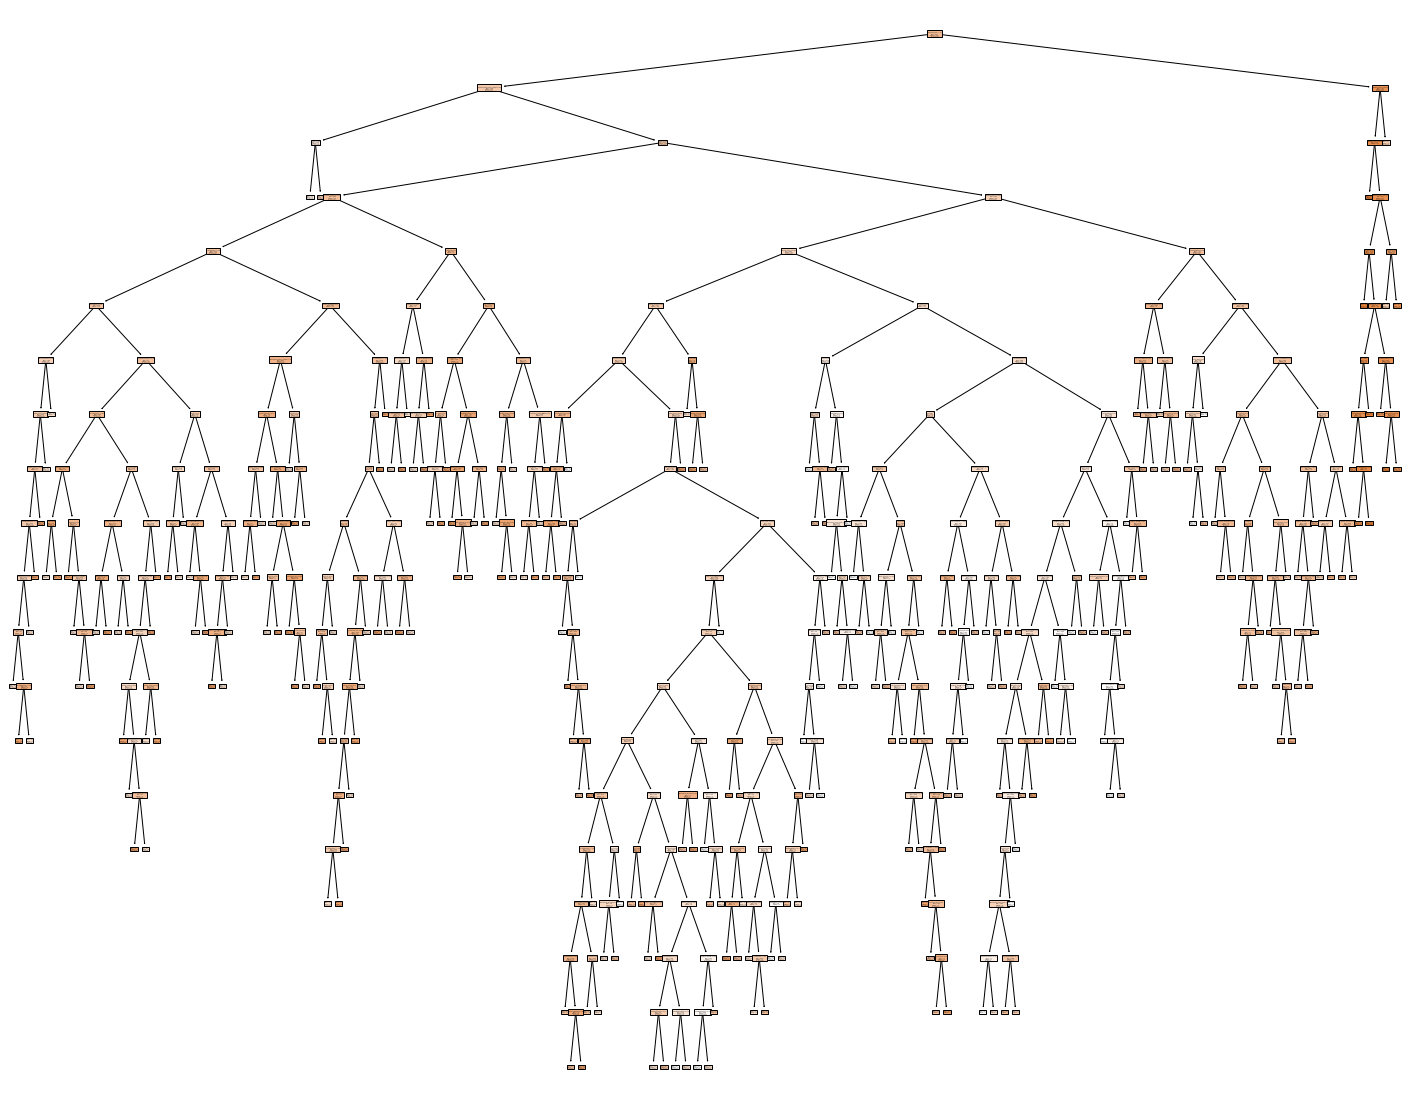

In [104]:
fig_dec_tree = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, 
                   feature_names=features,  
                   class_names=data['JobRoleCategory'],
                   filled=True)

In [105]:
# RANDOM FOREST REGRESSOR

print('\n\n*** Random forest regressor ***')
# n_estimators represents the number of the trees
random_forest_regressor = RandomForestRegressor(n_estimators = 2, random_state = 1)

random_forest_regressor.fit(train_X, train_y)

forest_predictions = random_forest_regressor.predict(test_X)
        
accuracy_forest, error_rate_forest = compute_accuracy_and_error_rate(test_y, forest_predictions, len(forest_predictions))       

print('\n --- Predictions: \n', forest_predictions)
print('\n --- Actual: \n', test_y)
print('\n--- Accuracy: ', accuracy_forest)
print('\n--- Error rate: ', error_rate_forest)



*** Random forest regressor ***

 --- Correct predictions:  52

 --- Wrong predictions:  51

 --- Predictions: 
 [2.  8.  6.  8.  2.5 2.  1.5 4.  7.  7.  4.  5.  8.  4.  4.  7.  1.  1.
 4.  7.  5.  6.  4.  4.  7.  2.  7.  8.  4.  6.  0.  7.  5.  1.  7.  4.
 1.  1.  4.  4.  3.  2.  4.  8.  7.  4.  6.  5.  0.  1.  5.  4.  7.  2.
 7.  7.5 6.  6.  7.  4.  1.5 5.  3.  2.  3.  6.  4.  7.  7.  6.  0.  6.
 8.  6.  8.  1.5 4.  3.  8.  1.  7.  6.  2.5 1.  8.  4.  2.  4.5 7.  7.
 4.  7.  4.  2.  4.  0.  7.  4.  7.  5.  7.  5.  7. ]

 --- Actual: 
 1291    4
1153    8
720     6
763     8
976     4
       ..
1119    7
1117    6
659     7
304     0
708     7
Name: JobRoleCategory, Length: 103, dtype: int64

--- Accuracy:  0.5048543689320388

--- Error rate:  0.49514563106796117



Visualize Random Forest


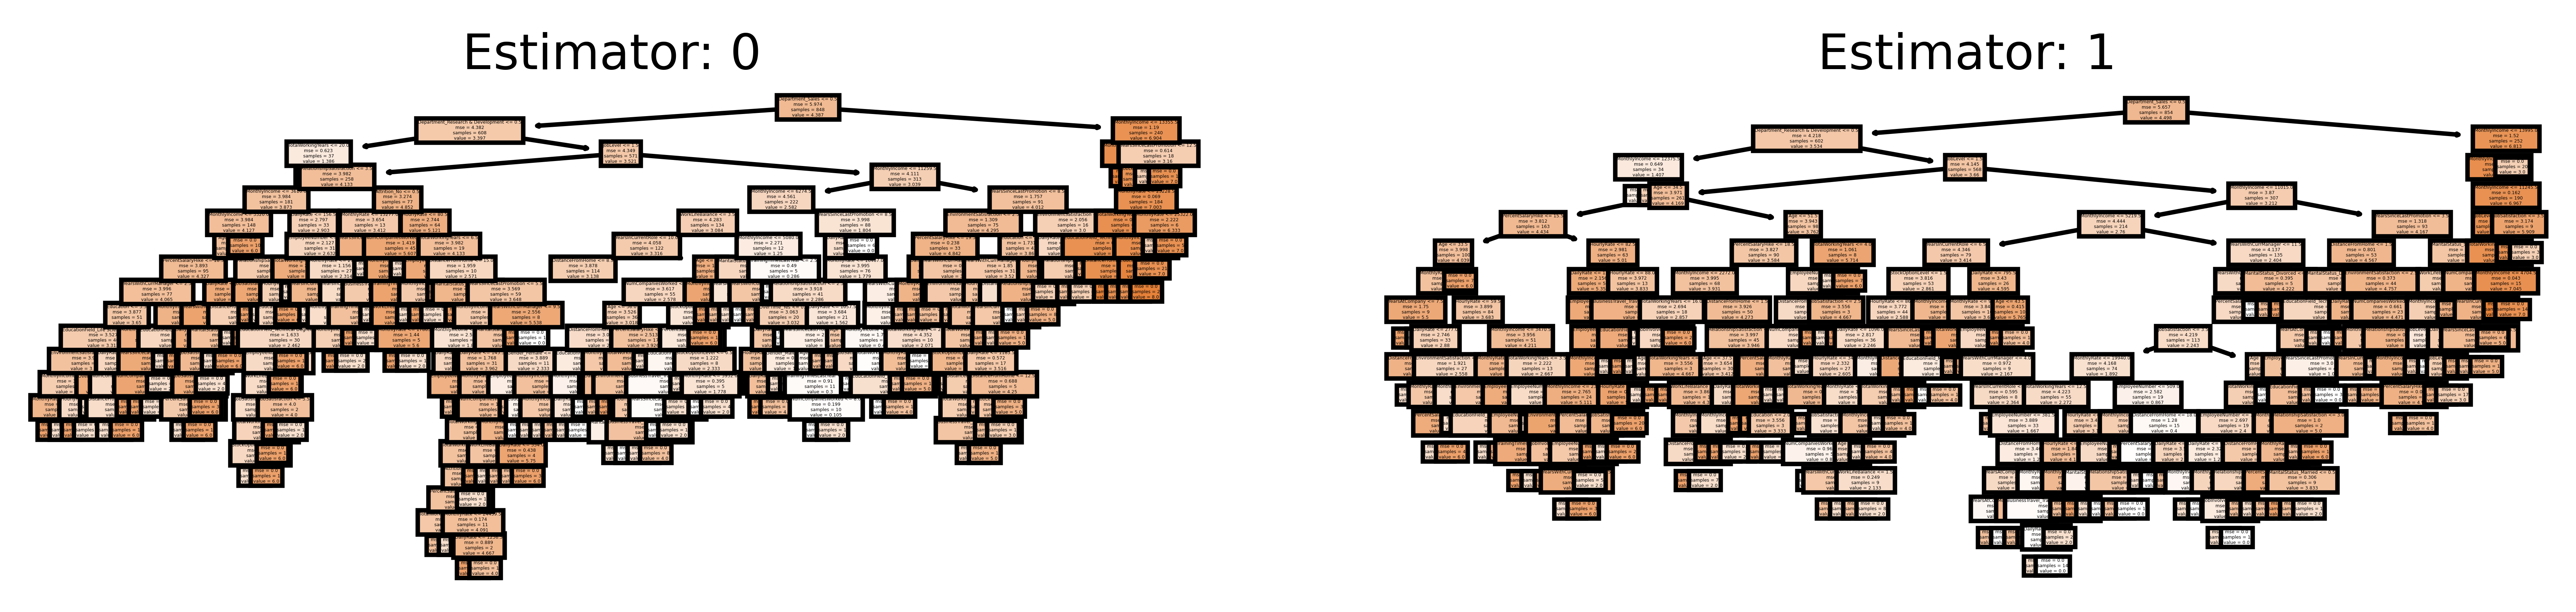

In [106]:
print('\nVisualize Random Forest') 
fig_forest, axes = plt.subplots(nrows = 1,ncols = 2,figsize = (10,2), dpi=900)
for index in range(0, 2):
    tree.plot_tree(random_forest_regressor.estimators_[index],
                   feature_names = features, 
                   class_names=data['JobRoleCategory'],
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

In [107]:
##########################################################################################################################
# Using just certain features

In [108]:
print('******************** Using just certain features *******************\n')
important_features = ['Education', 'EducationField', 'Department', 'HourlyRate', 'JobInvolvement', 'BusinessTravel', 'MonthlyIncome', 'Age', 'Attrition']
temp = data[important_features]
X_method2 = pd.get_dummies(temp)
y_method2 = data['JobRoleCategory']

print(X_method2.head())
print(y_method2.head())

train2_X, test2_X, train2_y, test2_y = train_test_split(X_method2, y_method2, test_size=0.2, random_state=1)

print('Initial size of the dataset:', len(X_method2))
print('The size of the dataset used for training the model: ',len(train2_X))
print('The size of the dataset used for validating the model: ',len(test2_X))


## DECISION TREE REGRESSOR

print('\n\n*** Decision tree regressor ***')
regressor2 = DecisionTreeRegressor(random_state=1)
regressor2.fit(train2_X, train2_y)

regressor2_predictions = regressor2.predict(test2_X)

accuracy_dec_tree2, error_rate_dec_tree2 = compute_accuracy_and_error_rate(test2_y, regressor2_predictions, len(regressor2_predictions))  

print('\n --- Predictions: \n', regressor2_predictions)
print('\n --- Actual: \n', test2_y)
print('\n--- Accuracy: ', accuracy_dec_tree2)
print('\n--- Error rate: ', error_rate_dec_tree2)


******************** Using just certain features *******************

   Education  HourlyRate  JobInvolvement  MonthlyIncome  Age  \
0          2          94               3           5993   41   
1          1          61               2           5130   49   
2          2          92               2           2090   37   
3          4          56               3           2909   33   
4          1          40               3           3468   27   

   EducationField_Human Resources  EducationField_Life Sciences  \
0                               0                             1   
1                               0                             1   
2                               0                             0   
3                               0                             1   
4                               0                             0   

   EducationField_Marketing  EducationField_Medical  EducationField_Other  \
0                         0                       0              

In [109]:
# RANDOM FOREST REGRESSOR

print('\n\n*** Random forest regressor ***')
random_forest_regressor2 = RandomForestRegressor(n_estimators = 2, random_state = 1)

random_forest_regressor2.fit(train2_X, train2_y)

forest_predictions2 = random_forest_regressor2.predict(test2_X)

accuracy_forest2, error_rate_forest2 = compute_accuracy_and_error_rate(test2_y, forest_predictions2, len(forest_predictions2))  

print('\n --- Predictions: \n', forest_predictions2)
print('\n --- Actual: \n', test2_y)
print('\n--- Accuracy: ', accuracy_forest2)
print('\n--- Error rate: ', error_rate_forest2)



*** Random forest regressor ***

 --- Correct predictions:  149

 --- Wrong predictions:  145

 --- Predictions: 
 [3.  8.  4.  8.  3.5 3.  4.  4.  7.  7.  4.5 2.5 8.  4.  2.  7.  1.  1.
 4.  7.  5.  6.  2.  0.  7.  0.  8.  8.  2.  2.  3.  7.  4.  0.  7.  4.
 1.  1.  2.  2.  1.  2.  5.  8.  7.  4.  4.  3.  2.  1.  5.  3.  7.  4.
 7.  7.  2.  6.  7.  2.  4.  2.  3.  2.  2.  2.  6.  7.  7.  2.  3.5 2.
 8.  4.  8.  4.  2.  4.  8.  1.  7.  4.  3.5 1.  8.  2.  2.  3.  7.  7.
 4.  7.  5.  5.  4.5 0.  7.  2.  7.  5.  7.  2.  7.  3.  7.  7.  2.  3.
 4.  5.  6.  3.  6.  5.  5.  8.  7.  4.  6.  4.  7.  2.  6.  4.  3.  4.
 0.  2.  3.  3.  6.  4.  5.  7.  0.  4.  6.  7.  2.  1.  2.  4.  7.  6.
 7.  6.  7.  7.  2.  4.  4.  2.  3.  5.  6.  2.  1.  7.  4.  6.  1.  2.
 1.  4.  6.  4.  3.  5.  2.  2.  0.  7.  4.  4.  4.  7.  4.  4.  3.  8.
 7.  7.  7.  4.  7.  7.  6.  3.  7.  4.  3.  3.  3.  8.  7.  7.  0.  7.
 4.  4.  8.  4.  4.  7.  7.  5.  3.  8.  2.  2.  7.  6.  7.  2.  4.  4.
 0.  6.  8.  4.  2.